In [85]:
import cv2
import dlib
from matplotlib import pyplot as plt
import faceBlendCommon as fbc
import numpy as np

In [98]:
img1 = cv2.imread("hillary-clinton.jpg")
img2 = cv2.imread("presidents/bill-clinton.jpg")
img1_f = np.float32(img1 / 255.0)
img2_f = np.float32(img2 / 255.0)

In [99]:
facedetector = dlib.get_frontal_face_detector()
landmarkdetector = dlib.shape_predictor("../shape_predictor_68_face_landmarks.dat")

In [100]:
img1_points = fbc.getLandmarks(facedetector, landmarkdetector, img1)
img2_points = fbc.getLandmarks(facedetector, landmarkdetector, img2)

points1 = np.array(img1_points)
points2 = np.array(img2_points)

In [101]:
(h, w) = (600, 600)
normimg1, normpts1 = fbc.normalizeImagesAndLandmarks((h, w), img1_f, points1)
normimg2, normpts2 = fbc.normalizeImagesAndLandmarks((h, w), img2_f, points2)

In [111]:
pointsAvg = (normpts1 + normpts2)/2.0
boundaryPoints = fbc.getEightBoundaryPoints(h, w)
pts1 = np.concatenate((normpts1, boundaryPoints), axis=0)
pts2 = np.concatenate((normpts2, boundaryPoints), axis=0)
ptsAvg = np.concatenate((pointsAvg,boundaryPoints), axis=0)
# Calculate Delaunay triangulation.
rect = (0, 0, w, h)
dt = fbc.calculateDelaunayTriangles(rect, ptsAvg)

In [112]:
print(len(pts1))
print(len(pts2))

76
76


In [113]:
len(ptsAvg)

76

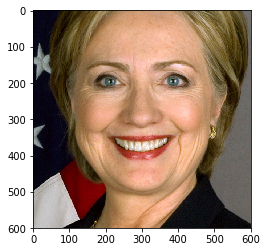

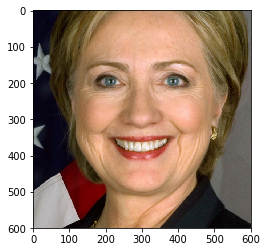

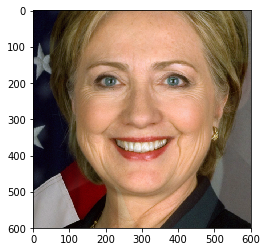

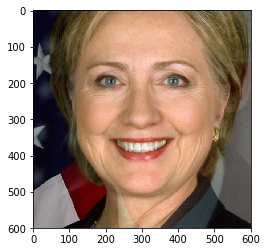

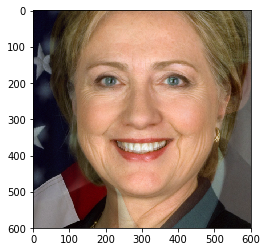

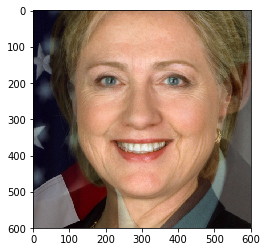

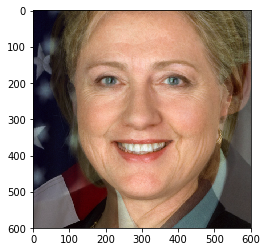

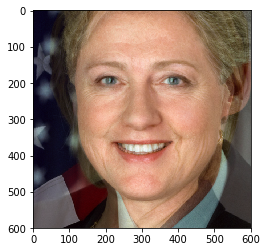

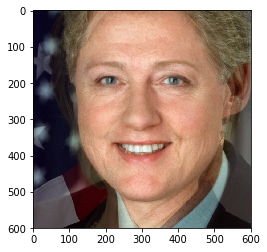

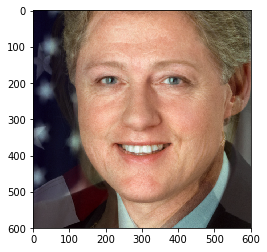

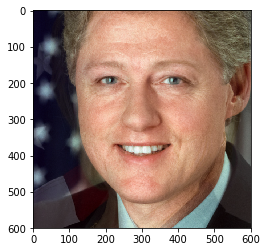

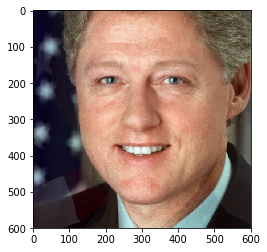

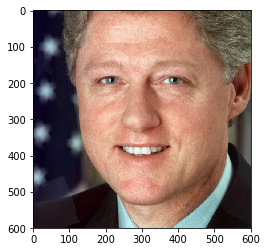

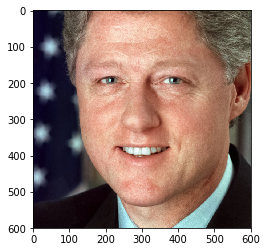

In [114]:
# Start animation.
alpha = 0
increaseAlpha = True

while True:
    # Compute landmark points based on morphing parameter alpha
    pointsMorph = (1 - alpha) * pts1 + alpha * pts2

    # Warp images such that normalized points line up 
    # with morphed points.
    imOut1 = fbc.warpImage(normimg1, pts1, pointsMorph.tolist(), dt)
    imOut2 = fbc.warpImage(normimg2, pts2, pointsMorph.tolist(), dt)

    # Blend warped images based on morphing parameter alpha
    imMorph = (1 - alpha) * imOut1 + alpha * imOut2
    
    # Keep animating by ensuring alpha stays between 0 and 1.
    if (alpha <= 0 and not increaseAlpha):
        increaseAlpha = True
    if (alpha >= 1 and increaseAlpha):
        break
        increaseAlpha = False

    if increaseAlpha:
        alpha += 0.075
    else:
        alpha -= 0.075

    plt.imshow(imMorph[:,:,::-1])
    plt.show()